<a href="https://colab.research.google.com/github/balavenkatanathan/ros2/blob/main/object-identifier(cups).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install ultralytics opencv-python pillow

In [28]:
from ultralytics import YOLO
import cv2
from PIL import Image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [29]:
model=YOLO("yolov8n.pt") #LOADING MODEL
TARGET_CLASS="cup"

In [33]:
uploaded=files.upload()
image_path=next(iter(uploaded.keys())) #UPLOADING FILES
print("Image uploaded:", image_path)

Saving 176750231-two-cups-of-coffee-a-bouquet-of-flowers-and-a-cup-of-coffee-on-a-glass-table-in-a-cafe.jpg to 176750231-two-cups-of-coffee-a-bouquet-of-flowers-and-a-cup-of-coffee-on-a-glass-table-in-a-cafe.jpg
Image uploaded: 176750231-two-cups-of-coffee-a-bouquet-of-flowers-and-a-cup-of-coffee-on-a-glass-table-in-a-cafe.jpg


In [34]:
def detect_mugs(image_path, model, conf=0.3):
  img=cv2.imread(image_path)
  results=model.predict(source=img, conf=conf, verbose=False)[0]
  boxes=results.boxes
  names=results.names

  mug_boxes=[]
  for box in boxes:
    cls_id=int(box.cls[0])
    cls_name=names.get(cls_id, "")
    if cls_name.lower()==TARGET_CLASS:
      xyxy=box.xyxy[0].cpu().numpy().astype(int)
      conf_score=float(box.conf[0])
      mug_boxes.append((xyxy, conf_score))
  for (x1, y1, x2, y2), conf in mug_boxes:
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img, f"Mug {conf:.2f}", (x1, y1-8),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

  return img[:,:,::-1], len(mug_boxes)


Detected mugs: 2


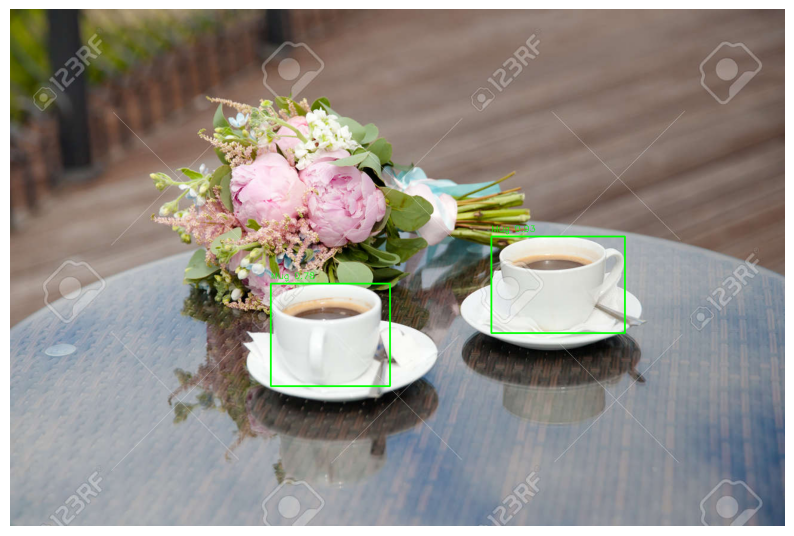

In [35]:
img_out, mug_count=detect_mugs(image_path, model)
print(f"Detected mugs: {mug_count}")

plt.figure(figsize=(10,8))
plt.imshow(img_out)
plt.axis("off")
plt.show()